<a href="https://colab.research.google.com/github/GazalaSayyad/Deep-Learning/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from copy import deepcopy

In [0]:
dataset = "Kcluster.csv"

In [0]:
data=pd.read_csv(dataset)

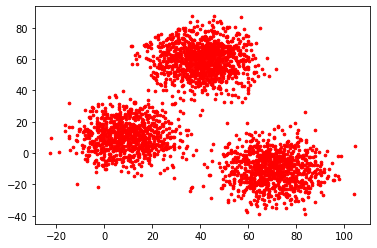

In [14]:
f1 = data['V1'].values
f2 = data['V2'].values
# Ploting the data
%matplotlib inline
# Combining f1 and f2 into a single array
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=7)
plt.show()

Eculidean Distance

In [0]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [16]:
k = 5
# X coordinates of random centroids
x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(x, y)), dtype=np.float32)
print(C)

[[52. 14.]
 [41.  6.]
 [46. 25.]
 [60. 80.]
 [10. 44.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


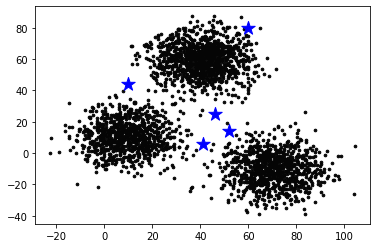

In [17]:
# Plotting along with the Centroids
%matplotlib inline
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(x, y, marker='*', s=200, c='B')
plt.show()

 K-means algorithm

error: 46.683613
error: 22.271912
error: 3.8841183
error: 0.54561615
error: 0.45303318
error: 0.35914066
error: 0.26265925
error: 0.29998973
error: 0.31447953
error: 0.16467817
error: 0.23197825
error: 0.28439602
error: 0.1956052
error: 0.3426228
error: 0.43633565
error: 0.34631556
error: 0.19954872
error: 0.2060901
error: 0.16440977
error: 0.32121724
error: 0.28810978
error: 0.18561591
error: 0.21937892
error: 0.07115301


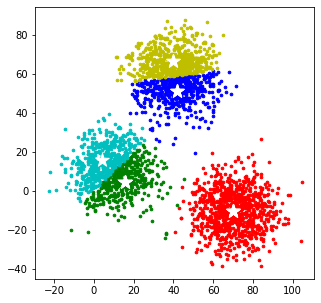

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()# turning on plot in interactive mode. This is because, as you'll see below, the plot keeps getting updated in loop.
while error >= 0.1:
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    
    # Assigning each value to its closest cluster
  
    for i in range(len(X)):
        distances = dist(X[i], C)#This find distance of X[i] from each of the 5 centroid points contained within C
        cluster = np.argmin(distances)# Out of all the distances found above, the centroid with the least distance is found here
        clusters[i] = cluster #The cluster center found above is now the new cluster assignment for the point X[i]

    # Storing the old centroid values
    C_old = deepcopy(C)# we use deep copy here because we don't want the changes in array C to be reflecting in C_old (because assignment is by reference)
    # Finding the new centroids by taking the average value
    
    for i in range(k):#we iterate through each of the 5 clusters.
        points = [X[j] for j in range(len(X)) if clusters[j] == i]#we pull out all the points that were assigned to the new cluster above (in 'clusters' variabe)
        C[i] = np.mean(points, axis=0)#Using the points above, we recomupte the new center, by taking the mean.

    error = dist(C, C_old, None)#now we compare the error between the new cluster centres and the old cluster centres.
    #print(k)
    ax.clear()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='w')

    print("error:",error)